In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
datafolder = '/content/drive/MyDrive/Classes/Neuro cognitive/'
mat = scipy.io.loadmat(datafolder + 'boldmodels.mat', squeeze_me = True)

In [4]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'timeSeries', 'mysteryTimeSeries', 'stimulusTiming', 'stimulusTimingLeft', 'stimulusTimingRight', 'stimY', 'stimX', 'stimImage', 'tSeries2', 'tSeries1', 'canonical'])

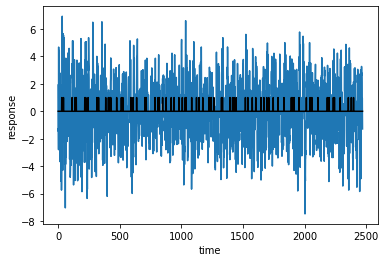

In [5]:
plt.plot(mat['timeSeries'])
plt.plot(mat['stimulusTiming'], 'k-')
plt.xlabel('time')
plt.ylabel('response');

In [6]:
n = len(mat['timeSeries'])
k = 30
s = np.zeros((n,k))
for i in range(k):
    s[:,i] = np.roll(mat['stimulusTiming'],i)

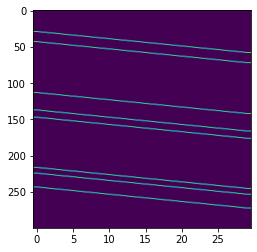

In [7]:
plt.imshow(s[0:300,:],aspect=0.1)

In [8]:
h = (np.linalg.inv(s.T @ s) @ s.T) @ mat['timeSeries']

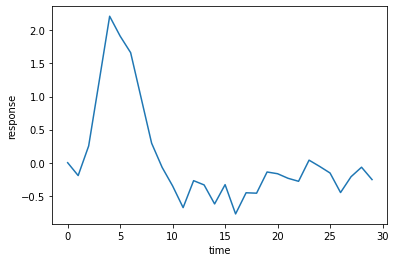

In [9]:
plt.plot(h)
plt.xlabel('time')
plt.ylabel('response');

### Challenge Question 1

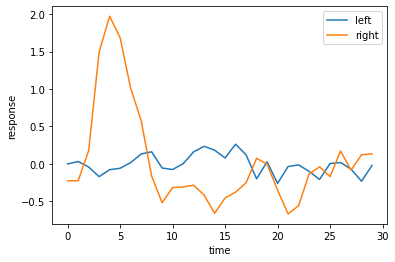

In [10]:
k = 30
ss = np.zeros((len(mat['mysteryTimeSeries']),2 * k))

for i in range(2 * k):
    ss[:,i] = (i<k) * np.roll(mat['stimulusTimingLeft'],i) + \
              (i>=k) * np.roll(mat['stimulusTimingRight'],i-k)

hh = (np.linalg.inv(ss.T @ ss) @ ss.T) @ mat['mysteryTimeSeries']

plt.plot(hh[:k],label = 'left')
plt.plot(hh[k:],label = 'right')
plt.xlabel('time')
plt.ylabel('response')
plt.legend(loc='best');

---
---

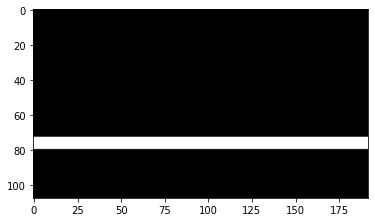

In [11]:
plt.imshow(mat['stimImage'][:,:,36],cmap="gray");

<Figure size 432x288 with 0 Axes>

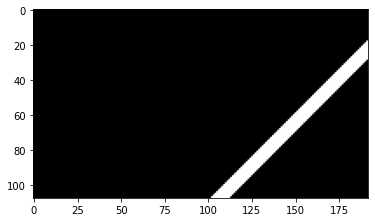

In [26]:
#import time
fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)

       
plt.show()
# loop over all frames of the image
for iFrame in range(0,mat['stimImage'].shape[-1]):
  # draw it
  plt.imshow(mat['stimImage'][:,:,iFrame],cmap="gray");
  # flush
  
  fig.canvas.draw()
  #plt.show()
  #ax.clear()
  #plt.clf()
  


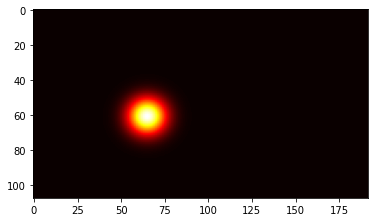

In [63]:
# set variables for the center and width
xCenter = -12
yCenter = -3
rfstd = 3
# compute the receptive field
rf = np.exp(-(np.power(mat['stimX']-xCenter,2) 
              + np.power(mat['stimY']-yCenter,2)) / (2*rfstd**2));
# and display
plt.imshow(rf,cmap="hot");

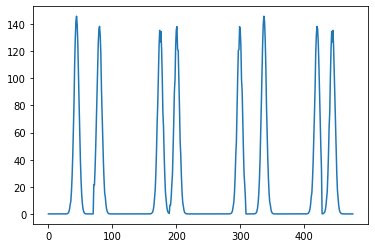

In [64]:
modelNeuralResponse = np.zeros(mat['stimImage'].shape[2])
# loop over frames
for iFrame in range(0,mat['stimImage'].shape[2]):
  # compute overlap
  rfStimulusOverlap = np.multiply(mat['stimImage'][:,:,iFrame],rf);
  # sum over all points
  modelNeuralResponse[iFrame] = np.sum(rfStimulusOverlap);
 
# plot what we got
plt.clf()
plt.plot(modelNeuralResponse);

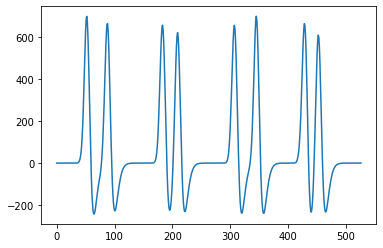

In [65]:
modelBoldResponse = np.convolve(modelNeuralResponse,mat['canonical']);
# and display
plt.clf()
plt.plot(modelBoldResponse);

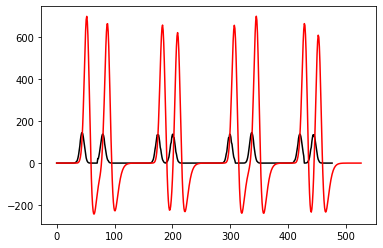

In [66]:
plt.clf();
plt.plot(modelNeuralResponse,'k-');
plt.plot(modelBoldResponse,'r-');

In [67]:
modelBoldResponse = modelBoldResponse[0:modelNeuralResponse.shape[0]].T

In [68]:
r1 = np.corrcoef(mat['tSeries1'],modelBoldResponse)[0,1]
r2 = np.corrcoef(mat['tSeries2'],modelBoldResponse)[0,1]
print(r1,r2)

0.8396720154995843 0.1711144922077444


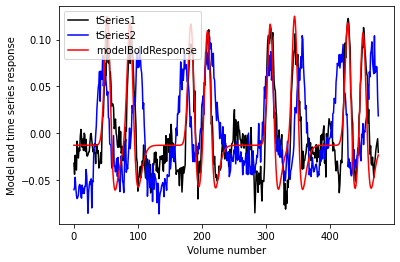

In [70]:
# normalize time series
tSeries1 = mat['tSeries1']
tSeries2 = mat['tSeries2']

tSeries1 = tSeries1-np.mean(tSeries1);
tSeries1 = tSeries1/np.sqrt(np.sum(np.power(tSeries1,2)));
tSeries2 = tSeries2-np.mean(tSeries2);
tSeries2 = tSeries2/np.sqrt(np.sum(np.power(tSeries2,2)));
# everything that is done to the data should also be done to the model
modelBoldResponse = modelBoldResponse-np.mean(modelBoldResponse);
modelBoldResponse = modelBoldResponse/np.sqrt(np.sum(np.power(modelBoldResponse,2)));
# now plot
plt.clf()
plt.plot(tSeries1,'k-')
plt.plot(tSeries2,'b-')
plt.plot(modelBoldResponse,'r-')
# label stuff
plt.xlabel('Volume number')
plt.ylabel('Model and time series response')
plt.legend(['tSeries1','tSeries2','modelBoldResponse'])

In [114]:
res = tSeries1 - modelBoldResponse
var = res @ res / (tSeries1 @ tSeries1)
print(1. - var / 2,r1)

0.8396720154995843 0.8396720154995844


In [22]:

xx = np.arange(-15,15,1) 
yy = np.arange(-15,15,1) 
ss = np.arange(1,5,1) 

rf = lambda x,y,xc,yc,s: np.exp(-(np.power(x-xc,2) + np.power(y-yc,2)) 
                                / (2*s**2));

r = -500
params = []

for x in xx:
    for y in yy:
        for s in ss:
            thisrf = rf(mat['stimX'],mat['stimY'],x,y,s)
            modelNeuralResponse = np.zeros(mat['stimImage'].shape[2])
            for i in range(0,mat['stimImage'].shape[2]):
              rfStimulusOverlap = np.multiply(mat['stimImage'][:,:,i],thisrf);
              modelNeuralResponse[i] = np.sum(rfStimulusOverlap);
            modelBoldResponse = np.convolve(modelNeuralResponse,mat['canonical']);
            modelBoldResponse = modelBoldResponse[0:modelNeuralResponse.shape[0]].T
            thisr = np.corrcoef(mat['tSeries2'],modelBoldResponse)[0,1]
            if thisr > r:
                r = thisr
                params = [x,y,s]
                
print(f'best r = {r:>.3f}, params = {params}')

best r = 0.753, params = [-3, -10, 4]
